# Project 2
Konstantinos Konstantinidis 2546

Nikolaos Stavrinos 2631

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import sklearn

#from mvlearn.semi_supervised import CTClassifier

In [2]:
dataset = pd.read_csv("credit_approval.csv")
dataset.head()

,C1,N2,N3,C4_enc,C5_enc,C6_enc,N7,C8,C9,N10,C11,C12_enc,N13,N14,Target
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [3]:
df_train, df_test = train_test_split(dataset, test_size = 0.2, random_state = 0)
print('Size of train dataframe: ', df_train.shape[0])
print('Size of test dataframe: ', df_test.shape[0])

Size of train dataframe:  552
Size of test dataframe:  138


# Preprocessing for 10, 20, 30 and 40 percent labeled data

In [4]:
#10%

df_train_10=df_train.copy()
df_train_10['Random_Mask'] = True
df_train_10.loc[df_train.sample(frac=0.10, random_state=0).index, 'Random_Mask'] = False

# Create a new target colum with labels. The 1's and 0's are original labels and -1 represents unlabeled (masked) data
df_train_10['Target']=df_train_10.apply(lambda x: x['Target'] if x['Random_Mask']==False else -1, axis=1)

# Show target value distribution
print('Target Value Distribution for 10%:')
print(df_train_10['Target'].value_counts())




#20%


df_train_20=df_train.copy()
df_train_20['Random_Mask'] = True
df_train_20.loc[df_train.sample(frac=0.20, random_state=0).index, 'Random_Mask'] = False

# Create a new target colum with labels. The 1's and 0's are original labels and -1 represents unlabeled (masked) data
df_train_20['Target']=df_train_20.apply(lambda x: x['Target'] if x['Random_Mask']==False else -1, axis=1)

# Show target value distribution
print('Target Value Distribution for 20%:')
print(df_train_20['Target'].value_counts())

#30%

df_train_30=df_train.copy()
df_train_30['Random_Mask'] = True
df_train_30.loc[df_train.sample(frac=0.30, random_state=0).index, 'Random_Mask'] = False

# Create a new target colum with labels. The 1's and 0's are original labels and -1 represents unlabeled (masked) data
df_train_30['Target']=df_train_30.apply(lambda x: x['Target'] if x['Random_Mask']==False else -1, axis=1)

# Show target value distribution
print('Target Value Distribution for 30%:')
print(df_train_30['Target'].value_counts())


#40%

df_train_40=df_train.copy()
df_train_40['Random_Mask'] = True
df_train_40.loc[df_train.sample(frac=0.40, random_state=0).index, 'Random_Mask'] = False

# Create a new target colum with labels. The 1's and 0's are original labels and -1 represents unlabeled (masked) data
df_train_40['Target']=df_train_40.apply(lambda x: x['Target'] if x['Random_Mask']==False else -1, axis=1)

# Show target value distribution
print('Target Value Distribution for 40%:')
print(df_train_40['Target'].value_counts())



Target Value Distribution for 10%:
-1    497
 1     28
 0     27
Name: Target, dtype: int64
Target Value Distribution for 20%:
-1    442
 0     61
 1     49
Name: Target, dtype: int64
Target Value Distribution for 30%:
-1    386
 0     96
 1     70
Name: Target, dtype: int64
Target Value Distribution for 40%:
-1    331
 0    130
 1     91
Name: Target, dtype: int64


In [5]:
X_train_10 = df_train_10.drop(["Random_Mask","Target"],1)
y_train_10 = df_train_10["Target"]


X_train_20 = df_train_20.drop(["Random_Mask","Target"],1)
y_train_20 = df_train_20["Target"]


X_train_30 = df_train_30.drop(["Random_Mask","Target"],1)
y_train_30 = df_train_30["Target"]


X_train_40 = df_train_40.drop(["Random_Mask","Target"],1)
y_train_40 = df_train_40["Target"]


X_test = df_test.drop(["Target"],1)
y_test = df_test["Target"]

# Self training with:
## Svc, Naive Bayes, Knn, Decision tree

In [6]:
import warnings
warnings.filterwarnings("ignore")

svc = SVC(probability=True,kernel='poly',degree=1)
gnb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=3)
tree = DecisionTreeClassifier(min_samples_leaf=2)

self_training_svm = SelfTrainingClassifier(svc,max_iter=40)
self_training_gnb = SelfTrainingClassifier(gnb,max_iter=40)
self_training_knn = SelfTrainingClassifier(knn,max_iter=40)
self_training_tree = SelfTrainingClassifier(tree,max_iter=40)


#90% UNLABELED DATA

#SVM
self_training_svm.fit(X_train_10, y_train_10)


#NB
self_training_gnb.fit(X_train_10, y_train_10)


#KNN
self_training_knn.fit(X_train_10, y_train_10)

#TREE
self_training_tree.fit(X_train_10, y_train_10)




#scores for 90%
score_10_svm = self_training_svm.score(X_test, y_test)
score_10_gnb = self_training_gnb.score(X_test, y_test)
score_10_knn = self_training_knn.score(X_test, y_test)
score_10_tree = self_training_tree.score(X_test, y_test)



#80% UNLABELED DATA

#SVM
self_training_svm.fit(X_train_20, y_train_20)


#NB
self_training_gnb.fit(X_train_20, y_train_20)


#KNN
self_training_knn.fit(X_train_20, y_train_20)

#TREE
self_training_tree.fit(X_train_20, y_train_20)



#scores for 80%
score_20_svm = self_training_svm.score(X_test, y_test)
score_20_gnb = self_training_gnb.score(X_test, y_test)
score_20_knn = self_training_knn.score(X_test, y_test)
score_20_tree = self_training_tree.score(X_test, y_test)



#70% UNLABELED DATA

#SVM
self_training_svm.fit(X_train_30, y_train_30)


#NB
self_training_gnb.fit(X_train_30, y_train_30)


#KNN
self_training_knn.fit(X_train_30, y_train_30)

#TREE
self_training_tree.fit(X_train_30, y_train_30)



#scores for 70%
score_30_svm = self_training_svm.score(X_test, y_test)
score_30_gnb = self_training_gnb.score(X_test, y_test)
score_30_knn = self_training_knn.score(X_test, y_test)
score_30_tree = self_training_tree.score(X_test, y_test)



#60% UNLABELED DATA

#SVM
self_training_svm.fit(X_train_40, y_train_40)


#NB
self_training_gnb.fit(X_train_40, y_train_40)


#KNN
self_training_knn.fit(X_train_40, y_train_40)

#TREE
self_training_tree.fit(X_train_40, y_train_40)


#scores for 60%
score_40_svm = self_training_svm.score(X_test, y_test)
score_40_gnb = self_training_gnb.score(X_test, y_test)
score_40_knn = self_training_knn.score(X_test, y_test)
score_40_tree = self_training_tree.score(X_test, y_test)


print("Scores for 10%: ")
print("SMO: " + str(score_10_svm) + " \nNAIVE BAYES: " + str(score_10_gnb) + " \nKNN: " + str(score_10_knn)+ " \nTREE: " + str(score_10_tree))
print("\n")
print("Scores for 20%: ")
print("SMO: " + str(score_20_svm) + " \nNAIVE BAYES: " + str(score_20_gnb) + " \nKNN: " + str(score_20_knn)+ " \nTREE: " + str(score_20_tree))
print("\n")
print("Scores for 30%: ")
print("SMO: " + str(score_30_svm) + " \nNAIVE BAYES: " + str(score_30_gnb) + " \nKNN: " + str(score_30_knn)+ " \nTREE: " + str(score_30_tree))
print("\n")
print("Scores for 40%: ")
print("SMO: " + str(score_40_svm) + " \nNAIVE BAYES: " + str(score_40_gnb) + " \nKNN: " + str(score_40_knn)+ " \nTREE: " + str(score_40_tree))

Scores for 10%: 
SMO: 0.572463768115942 
NAIVE BAYES: 0.8115942028985508 
KNN: 0.644927536231884 
TREE: 0.7971014492753623


Scores for 20%: 
SMO: 0.6014492753623188 
NAIVE BAYES: 0.8188405797101449 
KNN: 0.6376811594202898 
TREE: 0.855072463768116


Scores for 30%: 
SMO: 0.5942028985507246 
NAIVE BAYES: 0.8260869565217391 
KNN: 0.6594202898550725 
TREE: 0.8405797101449275


Scores for 40%: 
SMO: 0.6086956521739131 
NAIVE BAYES: 0.8043478260869565 
KNN: 0.6739130434782609 
TREE: 0.8623188405797102


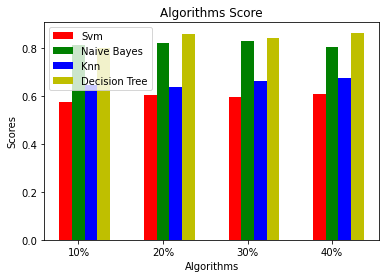

In [13]:


import numpy as np 

import matplotlib.pyplot as plt 

  

N = 4

ind = np.arange(N)  

width = 0.15

  

svm = [score_10_svm, score_20_svm, score_30_svm,score_40_svm] 

bar1 = plt.bar(ind, svm, width, color = 'r') 

  

gnb = [score_10_gnb, score_20_gnb, score_30_gnb,score_40_gnb] 

bar2 = plt.bar(ind+width, gnb, width, color='g') 

  

knn = [score_10_knn, score_20_knn, score_30_knn,score_40_knn] 

bar3 = plt.bar(ind+width*2, knn, width, color = 'b') 

tree = [score_10_tree, score_20_tree, score_30_tree,score_40_tree] 

bar4 = plt.bar(ind+width*3, tree, width, color = 'y') 

  

plt.xlabel("Algorithms") 

plt.ylabel('Scores') 

plt.title("Algorithms Score") 

  

plt.xticks(ind+width,['10%', '20%', '30%','40%']) 

plt.legend( (bar1, bar2, bar3,bar4), ('Svm', 'Naive Bayes', 'Knn','Decision Tree') ) 
plt.show()

# Tritraining with:
## Svc, Naive Bayes, Knn, Decision tree

In [14]:
class TriTraining:
    def __init__(self, classifier):
        if sklearn.base.is_classifier(classifier):
            self.classifiers = [sklearn.base.clone(classifier) for i in range(3)]
        else:
            self.classifiers = [sklearn.base.clone(classifier[i]) for i in range(3)]
            
    def fit(self, L_X, L_y, U_X):
            
        for i in range(3):
            sample = sklearn.utils.resample(L_X, L_y)  # BootstrapSample(L)
            self.classifiers[i].fit(*sample)  # Learn(Si)   
        e_prime = [0.5]*3
        l_prime = [0]*3
        e = [0]*3
        update = [False]*3
        Li_X, Li_y = [[]]*3, [[]]*3#to save proxy labeled data
        improve = True
        self.iter = 0
        
        while improve:
            self.iter += 1#count iterations 
            
            for i in range(3):    
                j, k = np.delete(np.array([0,1,2]),i)
                update[i] = False
                e[i] = self.measure_error(L_X, L_y, j, k)
                if e[i] < e_prime[i]:
                    U_y_j = self.classifiers[j].predict(U_X)
                    U_y_k = self.classifiers[k].predict(U_X)
                    Li_X[i] = U_X[U_y_j == U_y_k]#when two models agree on the label, save it
                    Li_y[i] = U_y_j[U_y_j == U_y_k]
                    if l_prime[i] == 0:#no updated before
                        l_prime[i]  = int(e[i]/(e_prime[i] - e[i]) + 1)
                    if l_prime[i] <len(Li_y[i]):
                        if e[i]*len(Li_y[i])<e_prime[i] * l_prime[i]:
                            update[i] = True
                        elif l_prime[i] > e[i]/(e_prime[i] - e[i]):
                            L_index = np.random.choice(len(Li_y[i]), int(e_prime[i] * l_prime[i]/e[i] -1))#subsample from proxy labeled data
                            Li_X[i], Li_y[i] = Li_X[i][L_index], Li_y[i][L_index]
                            update[i] = True
             
            for i in range(3):
                if update[i]:
                    self.classifiers[i].fit(np.append(L_X,Li_X[i],axis=0), np.append(L_y, Li_y[i], axis=0))#train the classifier on integrated dataset
                    e_prime[i] = e[i]
                    l_prime[i] = len(Li_y[i])
    
            if update == [False]*3:
                improve = False#if no classifier was updated, no improvement


    def predict(self, X):
        pred = np.asarray([self.classifiers[i].predict(X) for i in range(3)])
        pred[0][pred[1]==pred[2]] = pred[1][pred[1]==pred[2]]
        return pred[0]
        
    def score(self, X, y):
        return sklearn.metrics.accuracy_score(y, self.predict(X))
        
    def measure_error(self, X, y, j, k):
        j_pred = self.classifiers[j].predict(X)
        k_pred = self.classifiers[k].predict(X)
        wrong_index =np.logical_and(j_pred != y, k_pred==j_pred)#model_j and model_k make the same wrong prediction
        #wrong_index =np.logical_and(j_pred != y_test, k_pred!=y_test)
        return sum(wrong_index)/sum(j_pred == k_pred)

In [15]:
def data_process(X_train, y_train, label_rate):
    rng = np.random.RandomState(42)
    labeled_index = rng.rand(len(y_train)) < label_rate
    unlabeled_index = np.logical_not(labeled_index)
    L_X = X_train[labeled_index]#data of L
    L_y = y_train[labeled_index]#lable of L
    U_X = X_train[unlabeled_index]#data of U
    return L_X, L_y, U_X

In [16]:
classifiers = [[]]*4

classifiers[0]= DecisionTreeClassifier(min_samples_leaf=2)
classifiers[1] = SVC(probability=True,kernel='poly',degree=1)
classifiers[2] = GaussianNB()
classifiers[3] = KNeighborsClassifier(n_neighbors=3)


L_X_10, L_y_10, U_X_10 = data_process(df_train.iloc[:, :-1].values, df_train.iloc[:, -1].values, 0.9)
L_X_20, L_y_20, U_X_20 = data_process(df_train.iloc[:, :-1].values, df_train.iloc[:, -1].values, 0.8)
L_X_30, L_y_30, U_X_30 = data_process(df_train.iloc[:, :-1].values, df_train.iloc[:, -1].values, 0.7)
L_X_40, L_y_40, U_X_40= data_process(df_train.iloc[:, :-1].values, df_train.iloc[:, -1].values, 0.6)


#10%
tri_training_svm = TriTraining(classifiers[1])
tri_training_svm.fit(L_X_10, L_y_10, U_X_10)

tri_training_gnb = TriTraining(classifiers[2])
tri_training_gnb.fit(L_X_10, L_y_10, U_X_10)

tri_training_knn = TriTraining(classifiers[3])
tri_training_knn.fit(L_X_10, L_y_10, U_X_10)

tri_training_tree = TriTraining(classifiers[0])
tri_training_tree.fit(L_X_10, L_y_10, U_X_10)

score_10_svm = tri_training_svm.score(X_test, y_test)
score_10_gnb = tri_training_gnb.score(X_test, y_test)
score_10_knn = tri_training_knn.score(X_test, y_test)
score_10_tree = tri_training_tree.score(X_test, y_test)


#20%
tri_training_svm = TriTraining(classifiers[1])
tri_training_svm.fit(L_X_20, L_y_20, U_X_20)

tri_training_gnb = TriTraining(classifiers[2])
tri_training_gnb.fit(L_X_20, L_y_20, U_X_20)

tri_training_knn = TriTraining(classifiers[3])
tri_training_knn.fit(L_X_20, L_y_20, U_X_20)

tri_training_tree = TriTraining(classifiers[0])
tri_training_tree.fit(L_X_20, L_y_20, U_X_20)

score_20_svm = tri_training_svm.score(X_test, y_test)
score_20_gnb = tri_training_gnb.score(X_test, y_test)
score_20_knn = tri_training_knn.score(X_test, y_test)
score_20_tree = tri_training_tree.score(X_test, y_test)


#30%
tri_training_svm = TriTraining(classifiers[1])
tri_training_svm.fit(L_X_30, L_y_30, U_X_30)

tri_training_gnb = TriTraining(classifiers[2])
tri_training_gnb.fit(L_X_30, L_y_30, U_X_30)

tri_training_knn = TriTraining(classifiers[3])
tri_training_knn.fit(L_X_30, L_y_30, U_X_30)

tri_training_tree = TriTraining(classifiers[0])
tri_training_tree.fit(L_X_30, L_y_30, U_X_30)

score_30_svm = tri_training_svm.score(X_test, y_test)
score_30_gnb = tri_training_gnb.score(X_test, y_test)
score_30_knn = tri_training_knn.score(X_test, y_test)
score_30_tree = tri_training_tree.score(X_test, y_test)


#40%
tri_training_svm = TriTraining(classifiers[1])
tri_training_svm.fit(L_X_40, L_y_40, U_X_40)

tri_training_gnb = TriTraining(classifiers[2])
tri_training_gnb.fit(L_X_40, L_y_40, U_X_40)

tri_training_knn = TriTraining(classifiers[3])
tri_training_knn.fit(L_X_40, L_y_40, U_X_40)

tri_training_tree = TriTraining(classifiers[0])
tri_training_tree.fit(L_X_40, L_y_40, U_X_40)

score_40_svm = tri_training_svm.score(X_test, y_test)
score_40_gnb = tri_training_gnb.score(X_test, y_test)
score_40_knn = tri_training_knn.score(X_test, y_test)
score_40_tree = tri_training_tree.score(X_test, y_test)



print("Scores for 10%: ")
print("SMO: " + str(score_10_svm) + " \nNAIVE BAYES: " + str(score_10_gnb) + " \nKNN: " + str(score_10_knn)+ " \nTREE: " + str(score_10_tree))
print("\n")
print("Scores for 20%: ")
print("SMO: " + str(score_20_svm) + " \nNAIVE BAYES: " + str(score_20_gnb) + " \nKNN: " + str(score_20_knn)+ " \nTREE: " + str(score_20_tree))
print("\n")
print("Scores for 30%: ")
print("SMO: " + str(score_30_svm) + " \nNAIVE BAYES: " + str(score_30_gnb) + " \nKNN: " + str(score_30_knn)+ " \nTREE: " + str(score_30_tree))
print("\n")
print("Scores for 40%: ")
print("SMO: " + str(score_40_svm) + " \nNAIVE BAYES: " + str(score_40_gnb) + " \nKNN: " + str(score_40_knn)+ " \nTREE: " + str(score_40_tree))


Scores for 10%: 
SMO: 0.6159420289855072 
NAIVE BAYES: 0.8043478260869565 
KNN: 0.7391304347826086 
TREE: 0.9057971014492754


Scores for 20%: 
SMO: 0.6159420289855072 
NAIVE BAYES: 0.7971014492753623 
KNN: 0.7318840579710145 
TREE: 0.8623188405797102


Scores for 30%: 
SMO: 0.6086956521739131 
NAIVE BAYES: 0.782608695652174 
KNN: 0.7028985507246377 
TREE: 0.8188405797101449


Scores for 40%: 
SMO: 0.6086956521739131 
NAIVE BAYES: 0.782608695652174 
KNN: 0.6594202898550725 
TREE: 0.8405797101449275


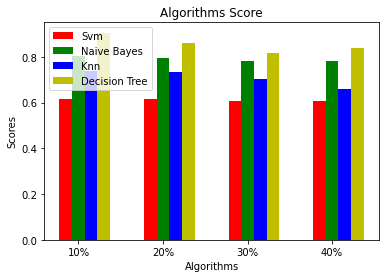

In [17]:
N = 4

ind = np.arange(N)  

width = 0.15

  

svm = [score_10_svm, score_20_svm, score_30_svm,score_40_svm] 

bar1 = plt.bar(ind, svm, width, color = 'r') 

  

gnb = [score_10_gnb, score_20_gnb, score_30_gnb,score_40_gnb] 

bar2 = plt.bar(ind+width, gnb, width, color='g') 

  

knn = [score_10_knn, score_20_knn, score_30_knn,score_40_knn] 

bar3 = plt.bar(ind+width*2, knn, width, color = 'b') 

tree = [score_10_tree, score_20_tree, score_30_tree,score_40_tree] 

bar4 = plt.bar(ind+width*3, tree, width, color = 'y') 

  

plt.xlabel("Algorithms") 

plt.ylabel('Scores') 

plt.title("Algorithms Score") 

  

plt.xticks(ind+width,['10%', '20%', '30%','40%']) 

plt.legend( (bar1, bar2, bar3,bar4), ('Svm', 'Naive Bayes', 'Knn','Decision Tree') ) 
plt.show()